In [108]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Feature Engineering/Preprocessing Data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

# Import models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# Import cross val and tuning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

# Import model evaluation
from sklearn.metrics import classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Model inference
import pickle

# import warning
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load dataset
df_ori = pd.read_csv('https://raw.githubusercontent.com/FTDS-learning-materials/phase-1/master/w1/P1W1D3AM%20-%20Feature%20Engineering%20-%20Part%201%20-%20Titanic.csv')

# Copy data ori
df = df_ori.copy()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Check dataset 1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


statement >>> misal ada missing value, mari lihat jumlah dan persentasenya

In [5]:
print(df.isnull().sum())
print(f'{round(df.isnull().mean()*100,2)}')

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64


karena kebutuhan kita skrg untuk belajar, jadi seluruh misval didrop saja.

In [6]:
df.dropna(inplace=True)

In [7]:
# check after drop
print(df.isnull().sum())
print(f'{round(df.isnull().mean()*100,2)}')

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Cabin          0.0
Embarked       0.0
dtype: float64


In [8]:
# Check data duplicate
df.duplicated().sum()

0

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
# Split num cat col
X = df.drop(['Survived'], axis=1)
y = df.Survived

In [11]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=70)
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
717,718,2,"Troutt, Miss. Edwina Celia ""Winnie""",female,27.0,0,0,34218,10.5000,E101,S
263,264,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,B94,S
710,711,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",female,24.0,0,0,PC 17482,49.5042,C90,C
97,98,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
310,311,1,"Hays, Miss. Margaret Bechstein",female,24.0,0,0,11767,83.1583,C54,C


Saya berasumsi passenger id, name, dan ticket itu korelasi dengan targetnya rendah.

In [12]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
# Feature selection
X_train.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
X_test.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [14]:
# Split num and cat col
num_col = X_train.select_dtypes(exclude=['object']).columns.tolist()
cat_col = X_train.select_dtypes(include=['object']).columns.tolist()

print(f'numerical :{num_col}')
print(f'categorical:{cat_col}')

numerical :['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
categorical:['Sex', 'Cabin', 'Embarked']


Setelah berhasil memisahkan categorical dan numerical column, sekarang saya akan melakukan scaling menggunakan `StandardScaler()` karena .... . Lalu mengencode dengan `OneHotEncoder()` karena .... . Setelah itu dimasukkan ke dalam variable preprocess untuk dilakukan transformasi menggunakan `ColumnTransformer`

In [15]:
# Feature scaling and encoding in column transformer
scaler = StandardScaler()
encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False) #sparse vs dense matrix

preprocess = ColumnTransformer(
    transformers=[
        ('numerical', scaler,num_col),
        ('categorical', encoder,cat_col)
        ], 
    remainder='passthrough'
)

In [16]:
# Model definition using pipeline
pipe_log = make_pipeline(preprocess,LogisticRegression())
pipe_svc = make_pipeline(preprocess,SVC())
pipe_knn = make_pipeline(preprocess,KNeighborsClassifier())
pipe_nb = make_pipeline(preprocess,GaussianNB())
pipe_dt = make_pipeline(preprocess,DecisionTreeClassifier(random_state=70))
pipe_rf = make_pipeline(preprocess,RandomForestClassifier(random_state=70))
pipe_ada = make_pipeline(preprocess,AdaBoostClassifier())

In [17]:
# Define cross val for each pipeline
cv_log = cross_val_score(pipe_log, X_train, y_train, cv = 5, scoring='f1', n_jobs=-1)
cv_svc = cross_val_score(pipe_svc, X_train, y_train, cv = 5, scoring='f1', n_jobs=-1)
cv_knn = cross_val_score(pipe_knn, X_train, y_train, cv = 5, scoring='f1', n_jobs=-1)
cv_nb = cross_val_score(pipe_nb, X_train, y_train, cv = 5, scoring='f1', n_jobs=-1)
cv_dt = cross_val_score(pipe_dt, X_train, y_train, cv = 5, scoring='f1', n_jobs=-1)
cv_rf = cross_val_score(pipe_rf, X_train, y_train, cv = 5, scoring='f1', n_jobs=-1)
cv_ada = cross_val_score(pipe_ada, X_train, y_train, cv = 5, scoring='f1', n_jobs=-1)

In [18]:
# Finding best model based on Cross_val_score (mean)

name_model = []
cv_scores = 0
for cv,name in zip([cv_log,cv_svc,cv_knn,cv_nb,cv_dt,cv_rf,cv_ada],
                   ['log','svc','knn','nb','dt','rf','ada']):
    
    print(name)
    print('f1-score - All - Cross Validation :', cv)
    print('f1-score - Mean - Cross Validation :', cv.mean())
    print('f1-score - Std - Cross Validation :', cv.std())
    print('f1-score - Range of test set :', (cv.mean()-cv.std()), '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean() > cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass

print(f'Best Model: {name_model}')
print(f'Cross Val Mean from best model: {cv_scores}')

log
f1-score - All - Cross Validation : [0.76190476 0.87179487 0.92682927 0.75675676 0.76923077]
f1-score - Mean - Cross Validation : 0.8173032855959684
f1-score - Std - Cross Validation : 0.06929807971867405
f1-score - Range of test set : 0.7480052058772944 - 0.8866013653146425
--------------------------------------------------
svc
f1-score - All - Cross Validation : [0.79069767 0.86486486 0.8372093  0.66666667 0.76923077]
f1-score - Mean - Cross Validation : 0.7857338555012973
f1-score - Std - Cross Validation : 0.06838921710377244
f1-score - Range of test set : 0.7173446383975248 - 0.8541230726050697
--------------------------------------------------
knn
f1-score - All - Cross Validation : [0.77272727 0.85714286 0.7804878  0.73684211 0.73684211]
f1-score - Mean - Cross Validation : 0.7768084290548989
f1-score - Std - Cross Validation : 0.04399642725151764
f1-score - Range of test set : 0.7328120018033812 - 0.8208048563064165
--------------------------------------------------
nb
f1-s

Best model nya RandomForest, sehingga kita akan melakukan model tuning untuk model RF. Pertama-tama kita cek dulu f1 score untuk train dan test nya beserta dengan False Negative dan Positive nya.

In [26]:
# train best model
pipe_rf.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical', StandardScaler(),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Sex', 'Cabin',
                                                   'Embarked'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=70))])

In [31]:
# Evaluate model RF
y_pred_train = pipe_rf.predict(X_train)
y_pred_test = pipe_rf.predict(X_test)

# Print classification report
print(f'Random Forest - train - Before Tuning:')
print(f'{classification_report(y_train, y_pred_train)}')
print('')
print(f'Random Forest - test - Before Tuning:')
print(f'{classification_report(y_test, y_pred_test)}')

Random Forest - train - Before Tuning:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        98

    accuracy                           1.00       146
   macro avg       1.00      1.00      1.00       146
weighted avg       1.00      1.00      1.00       146


Random Forest - test - Before Tuning:
              precision    recall  f1-score   support

           0       0.69      0.75      0.72        12
           1       0.88      0.84      0.86        25

    accuracy                           0.81        37
   macro avg       0.78      0.79      0.79        37
weighted avg       0.82      0.81      0.81        37



Fokus ke kita f1-score, untuk train = 100%, untuk test = 81%. Data survive-train = 98 data, survive-test = 25 data.

Text(0.5, 1.0, 'Before Tuning-test')

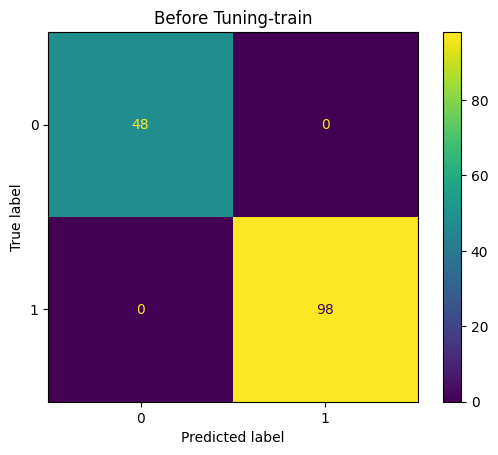

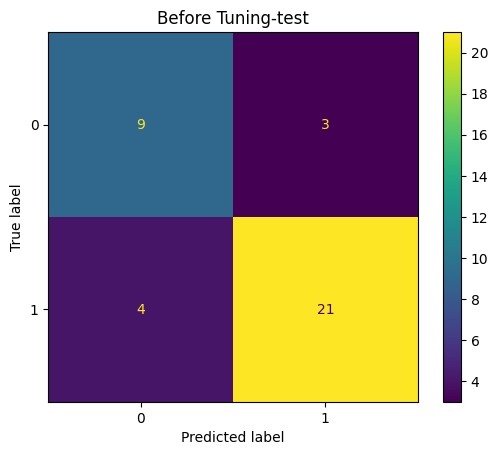

In [45]:
# Check False Negative and False Positive
cm_train = confusion_matrix(y_train, y_pred_train, labels=pipe_rf.classes_)
cm_test = confusion_matrix(y_test, y_pred_test, labels=pipe_rf.classes_)

disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=pipe_rf.classes_)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=pipe_rf.classes_)

disp_train.plot()
plt.title('Before Tuning-train')

disp_test.plot()
plt.title('Before Tuning-test')

Terlihat untuk train FN dan FP nya = 0, artinya ini membuktikan dari f1-score train sest nya yang 100%.  
- Test set ada FN = 4, artinya terdapat 4 data yang salah prediksi, diprediksi nya not survived(negative) tapi actual datanya adalah ssurvived(positive).  
- FP nya = 3 , artinya terdapat 3 data yang salah prediksi, diprediksi nya survived(positive), tapi actual datanya not survived(negative)

In [79]:
# create function to table reports recap
all_reports = {}
def performance_report(all_reports, y_train, y_pred_train, y_test,y_pred_test, name):
    # calculate f1-score
    train_f1 = f1_score(y_train,y_pred_train)
    test_f1 = f1_score(y_test,y_pred_test)

    # calculate fp fn
    cm_train = confusion_matrix(y_train, y_pred_train, labels=pipe_rf.classes_)
    cm_test = confusion_matrix(y_test, y_pred_test, labels=pipe_rf.classes_)
    
    # extract FP FN
    fn_train = cm_train[1,0]
    fp_train = cm_train[0,1]
    fn_test = cm_test[1,0]
    fp_test = cm_test[0,1]

    # create dictionary
    score_reports = {
        'train-f1score':train_f1,
        'test-f1score':test_f1,
        'train-false negative':fn_train,
        'test-false negative':fn_test,
        'train-false positive':fp_train,
        'test-false positive':fp_test
    }

    # add reports
    all_reports[name] = score_reports
    return all_reports

In [80]:
all_reports = performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, 'Before Tuning')
pd.DataFrame(all_reports)

,Before Tuning
test-f1score,0.857143
test-false negative,4.000000
test-false positive,3.000000
train-f1score,1.000000
train-false negative,0.000000
train-false positive,0.000000


Selanjutnya hyperparameter tuning untuk mencari nilai parameter terbaik.

In [81]:
np.linspace(1,10,10)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [102]:
# Define the random forest parameter grid
params = {
    'randomforestclassifier__n_estimators':(10,20,30,40,50,60,70,80,90,100,110),
    'randomforestclassifier__criterion':['gini','entropy','log_loss'],
    'randomforestclassifier__max_depth':(1,2,3,4,5,6,7,8,9,10),
    'randomforestclassifier__min_samples_split':(2,4,6,8,10),
    'randomforestclassifier__min_samples_leaf':(1,2,3,4,5)
}

# Define Random search
tuning = RandomizedSearchCV(pipe_rf, param_distributions = params, n_iter=25,cv=5, scoring='f1', n_jobs=-1, random_state = 27)

# Train the tune model
tuning.fit(X_train, y_train)

# Get best parameters
best_params = tuning.best_params_
print(f'Best Parameters: {best_params}')


Best Parameters: {'randomforestclassifier__n_estimators': 20, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__max_depth': 5, 'randomforestclassifier__criterion': 'entropy'}


In [103]:
# Get the best hyperparameters
bestParams = tuning.best_estimator_
bestParams

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical', StandardScaler(),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Sex', 'Cabin',
                                                   'Embarked'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', max_depth=5,
                                        min_samples_leaf=2, n_estimators=20,
                                        random_state=70))])

In [104]:
# Define best param & model tuning
best_rf = tuning.best_estimator_

# Evaluate best RF
y_pred_train_best = best_rf.predict(X_train)
y_pred_test_best = best_rf.predict(X_test)

# Print classification report
print(f'Random Forest - train - After Tuning:')
print(f'{classification_report(y_train, y_pred_train_best)}')
print('')
print(f'Random Forest - test - After Tuning:')
print(f'{classification_report(y_test, y_pred_test_best)}')

Random Forest - train - After Tuning:
              precision    recall  f1-score   support

           0       0.91      0.21      0.34        48
           1       0.72      0.99      0.83        98

    accuracy                           0.73       146
   macro avg       0.81      0.60      0.59       146
weighted avg       0.78      0.73      0.67       146


Random Forest - test - After Tuning:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.68      1.00      0.81        25

    accuracy                           0.68        37
   macro avg       0.34      0.50      0.40        37
weighted avg       0.46      0.68      0.54        37



Text(0.5, 1.0, 'After Tuning-test')

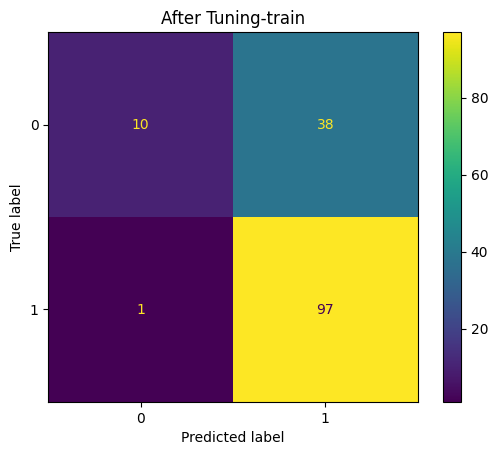

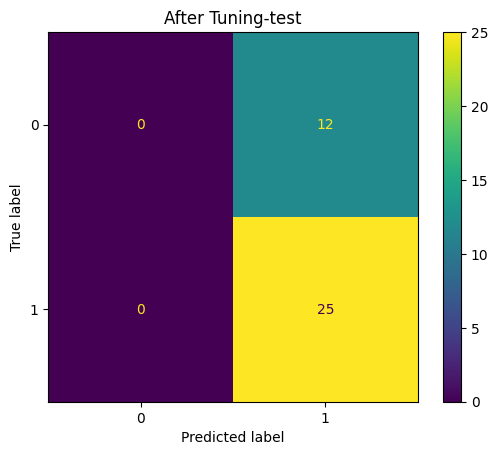

In [105]:
# Check False Negative and False Positive - After Tuning
cm_train_best = confusion_matrix(y_train, y_pred_train_best, labels=best_rf.classes_)
cm_test_best = confusion_matrix(y_test, y_pred_test_best, labels=best_rf.classes_)

disp_train_best = ConfusionMatrixDisplay(confusion_matrix=cm_train_best, display_labels=best_rf.classes_)
disp_test_best = ConfusionMatrixDisplay(confusion_matrix=cm_test_best, display_labels=best_rf.classes_)

disp_train_best.plot()
plt.title('After Tuning-train')

disp_test_best.plot()
plt.title('After Tuning-test')

In [106]:
all_reports = performance_report(all_reports, y_train, y_pred_train_best, y_test, y_pred_test_best, 'After Tuning')
pd.DataFrame(all_reports)

,Before Tuning,After Tuning
train-f1score,1.000000,0.832618
test-f1score,0.857143,0.806452
train-false negative,0.000000,1.000000
test-false negative,4.000000,0.000000
train-false positive,0.000000,38.000000
test-false positive,3.000000,12.000000


statement:  
Walopun train f1 turun dan test f1 turun, tapi model lebih goodfit, sesbenernya tadi dapat yg lebih bagus tapi lupa setting randomstate di randomsearchCV.

In [109]:
# Model Saving
with open('best_model.pkl', 'wb') as file_1: # wb = write binary
    pickle.dump(best_rf, file_1)

In [112]:
# Detect all original columns to create new inference data (unseen data)
print(df_ori.columns)
print(df_ori.loc[10])

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
PassengerId                                 11
Survived                                     1
Pclass                                       3
Name           Sandstrom, Miss. Marguerite Rut
Sex                                     female
Age                                        4.0
SibSp                                        1
Parch                                        1
Ticket                                 PP 9549
Fare                                      16.7
Cabin                                       G6
Embarked                                     S
Name: 10, dtype: object


### Conclusion: ...
- Kelebihan model (data seperti apa yang model bisa prediksi secara benar)
- Kelemahan model (data seperti apa yang model bisa miss prediksi)

- Further improvement:
   - Hal" apa yang bisa kalian suggest untuk diri kalian sendiri atau orang yang lain yang ingin meng-improve model kalian?
   - Contoh: gunakan scaling yang beda, pakai PCA, pakai gridsearchCV, dst...
- Business insight: rekomendasi terhadap stakeholders. 